In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("TSLA.CSV")

In [2]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [3]:
data[["Date","Open"]]

,Date,Open
0,2010-06-29,3.800000
1,2010-06-30,5.158000
2,2010-07-01,5.000000
3,2010-07-02,4.600000
4,2010-07-06,4.000000
...,...,...
2951,2022-03-18,874.489990
2952,2022-03-21,914.979980
2953,2022-03-22,930.000000
2954,2022-03-23,979.940002


In [4]:
data["Year"] = data["Date"].str.split("-").str[0]

In [5]:
year = data[["Year"]].value_counts()
year

Year
2020    253
2011    252
2013    252
2014    252
2015    252
2016    252
2019    252
2021    252
2017    251
2018    251
2012    250
2010    130
2022     57
dtype: int64

In [6]:
mean_open_by_year = data.groupby("Year")["Open"].mean()
mean_open_by_year_df = mean_open_by_year.reset_index()
mean_open_by_year_df.columns = ["Years","Open_Mean"]

mean_open_by_year_df

,Years,Open_Mean
0,2010,4.681600
1,2011,5.364397
2,2012,6.240624
3,2013,20.883286
4,2014,44.683079
5,2015,45.966389
6,2016,42.011690
7,2017,62.859243
8,2018,63.436693
9,2019,54.605627


In [7]:
max_open_by_year = data.groupby("Year")["Open"].max()
max_open_by_year_df = max_open_by_year.reset_index()
max_open_by_year_df.columns = ["Years","Open_Max"]

max_open_by_year_df

,Years,Open_Max
0,2010,7.174000
1,2011,6.926000
2,2012,7.638000
3,2013,38.792000
4,2014,57.534000
5,2015,56.040001
6,2016,53.290001
7,2017,77.337997
8,2018,75.000000
9,2019,87.000000


In [8]:
min_open_by_year = data.groupby("Year")["Open"].min()
min_open_by_year_df = min_open_by_year.reset_index()
min_open_by_year_df.columns = ["Years","Open_Min"]

min_open_by_year_df

,Years,Open_Min
0,2010,3.228000
1,2011,4.356000
2,2012,5.324000
3,2013,6.616000
4,2014,28.100000
5,2015,37.166000
6,2016,28.464001
7,2017,42.950001
8,2018,50.556000
9,2019,36.220001


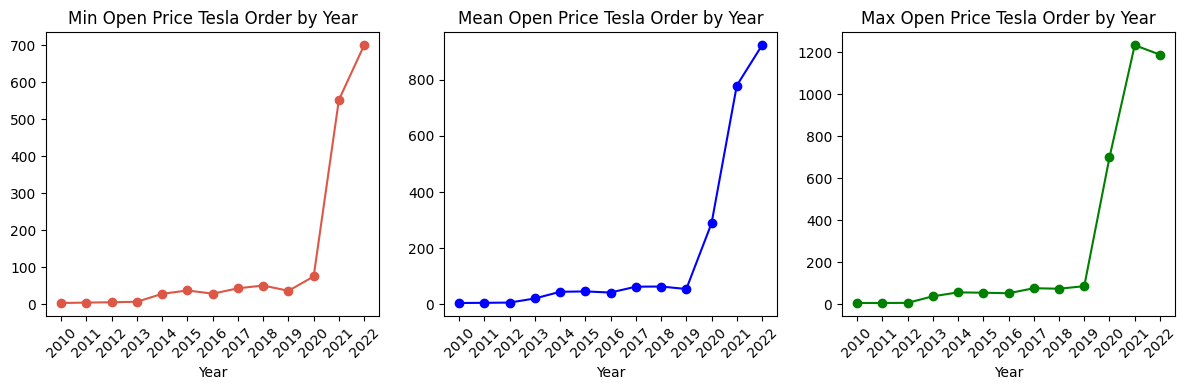

In [9]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)

xplot = min_open_by_year_df["Years"]
yplot = min_open_by_year_df["Open_Min"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="#DD5746")

plt.title("Min Open Price Tesla Order by Year")

plt.subplot(1,3,2)

xplot = mean_open_by_year_df["Years"]
yplot = mean_open_by_year_df["Open_Mean"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="blue")

plt.title("Mean Open Price Tesla Order by Year")

plt.subplot(1,3,3)

xplot = max_open_by_year_df["Years"]
yplot = max_open_by_year_df["Open_Max"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="green")

plt.title("Max Open Price Tesla Order by Year")


plt.tight_layout() 
plt.show()

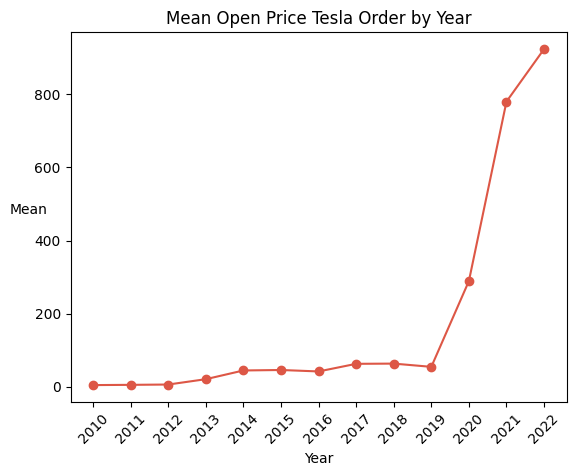

In [10]:
import matplotlib.pyplot as plt 

xplot = mean_open_by_year_df["Years"]
yplot = mean_open_by_year_df["Open_Mean"]

plt.xlabel("Year")
plt.ylabel("Mean",rotation = 0)

plt.title("Mean Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="#DD5746")
plt.show()

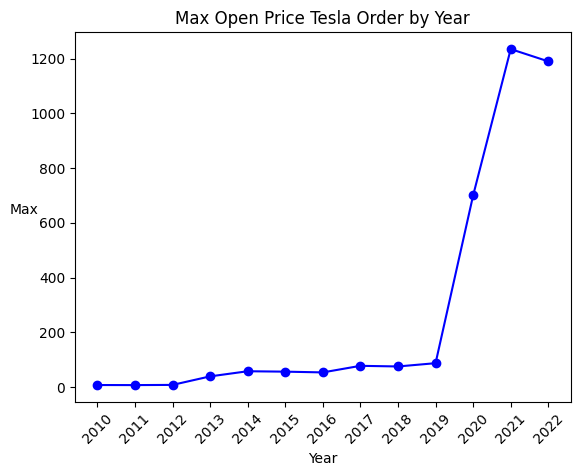

In [11]:
import matplotlib.pyplot as plt 

xplot = max_open_by_year_df["Years"]
yplot = max_open_by_year_df["Open_Max"]

plt.xlabel("Year")
plt.ylabel("Max",rotation = 0)

plt.title("Max Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="blue")
plt.show()

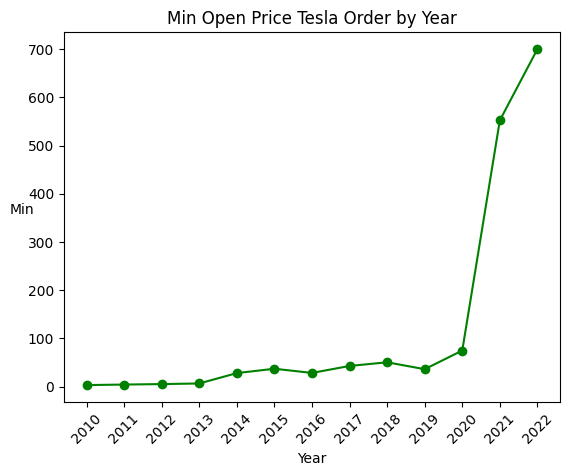

In [12]:
import matplotlib.pyplot as plt 

xplot = min_open_by_year_df["Years"]
yplot = min_open_by_year_df["Open_Min"]

plt.xlabel("Year")
plt.ylabel("Min",rotation = 0)

plt.title("Min Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="green")
plt.show()

In [13]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010
...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022


In [14]:
mean_close_by_year = data.groupby("Year")["Close"].mean()
mean_close_by_year_df = mean_close_by_year.reset_index()
mean_close_by_year_df.columns = ["Years","Close_Mean"]

mean_close_by_year_df

,Years,Close_Mean
0,2010,4.668369
1,2011,5.360952
2,2012,6.233720
3,2013,20.880246
4,2014,44.665817
5,2015,46.008580
6,2016,41.953452
7,2017,62.863259
8,2018,63.461984
9,2019,54.706040


In [15]:
max_close_by_year = data.groupby("Year")["Close"].max()
max_close_by_year_df = max_close_by_year.reset_index()
max_close_by_year_df.columns = ["Years","Close_Max"]

max_close_by_year_df

,Years,Close_Max
0,2010,7.094000
1,2011,6.988000
2,2012,7.602000
3,2013,38.674000
4,2014,57.208000
5,2015,56.452000
6,2016,53.084000
7,2017,77.000000
8,2018,75.914001
9,2019,86.188004


In [16]:
min_close_by_year = data.groupby("Year")["Close"].min()
min_close_by_year_df = min_close_by_year.reset_index()
min_close_by_year_df.columns = ["Years","Close_Min"]

min_close_by_year_df

,Years,Close_Min
0,2010,3.160000
1,2011,4.366000
2,2012,4.558000
3,2013,6.582000
4,2014,27.868000
5,2015,37.000000
6,2016,28.733999
7,2017,43.397999
8,2018,50.112000
9,2019,35.793999


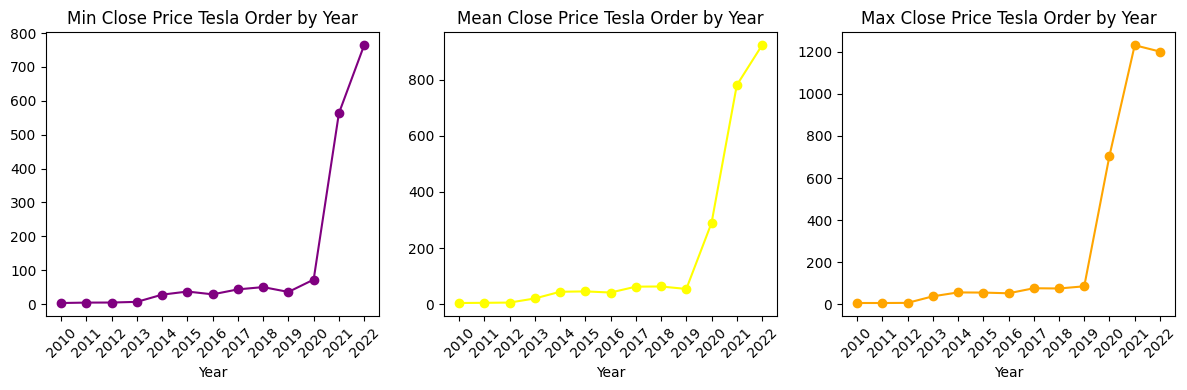

In [17]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)

xplot = min_close_by_year_df["Years"]
yplot = min_close_by_year_df["Close_Min"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="purple")

plt.title("Min Close Price Tesla Order by Year")

plt.subplot(1,3,2)

xplot = mean_close_by_year_df["Years"]
yplot = mean_close_by_year_df["Close_Mean"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="yellow")

plt.title("Mean Close Price Tesla Order by Year")

plt.subplot(1,3,3)

xplot = max_close_by_year_df["Years"]
yplot = max_close_by_year_df["Close_Max"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="orange")

plt.title("Max Close Price Tesla Order by Year")


plt.tight_layout() 
plt.show()

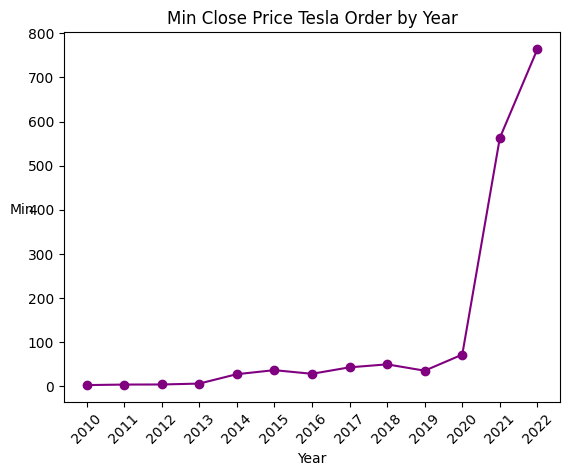

In [18]:
import matplotlib.pyplot as plt 

xplot = min_close_by_year_df["Years"]
yplot = min_close_by_year_df["Close_Min"]

plt.xlabel("Year")
plt.ylabel("Min",rotation = 0)

plt.title("Min Close Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="purple")
plt.show()

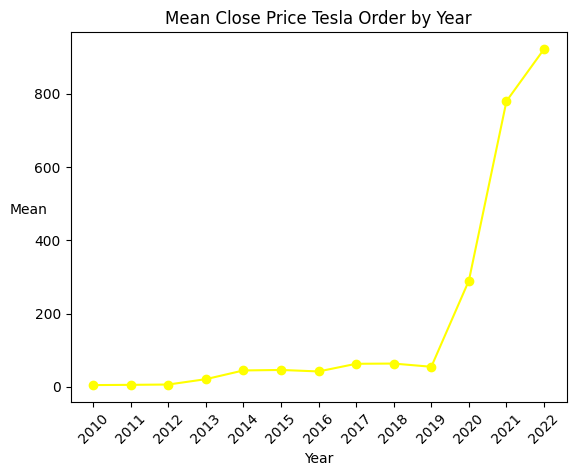

In [19]:
import matplotlib.pyplot as plt 

xplot = mean_close_by_year_df["Years"]
yplot = mean_close_by_year_df["Close_Mean"]

plt.xlabel("Year")
plt.ylabel("Mean",rotation = 0)

plt.title("Mean Close Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="yellow")
plt.show()

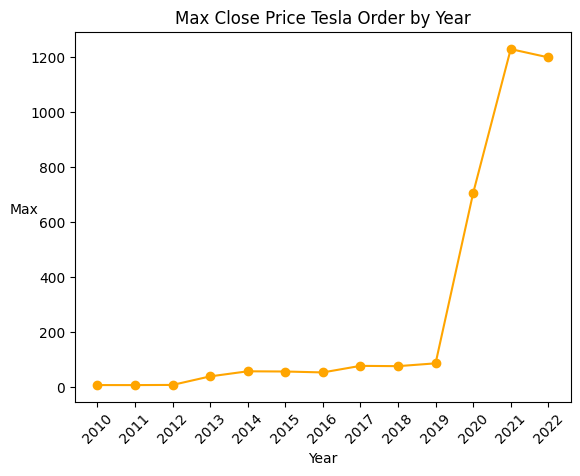

In [20]:
import matplotlib.pyplot as plt 

xplot = max_close_by_year_df["Years"]
yplot = max_close_by_year_df["Close_Max"]

plt.xlabel("Year")
plt.ylabel("Max",rotation = 0)

plt.title("Max Close Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="orange")
plt.show()

In [21]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010
...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022


In [22]:
max_close_selected_firstyear = max_close_by_year_df[max_close_by_year_df["Years"] == "2010"]
value_firstyear = max_close_selected_firstyear["Close_Max"].iloc[0]

max_close_selected_lastyear = max_close_by_year_df[max_close_by_year_df["Years"] == "2022"]
value_lastyear = max_close_selected_lastyear["Close_Max"].iloc[0]

res = ((value_firstyear-value_lastyear)/value_lastyear)*100

print("growth percent :",res)

growth percent : -99.40872494719612


In [23]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010
...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022


In [24]:
sum_volume = data.groupby("Year")["Volume"].sum()
sum_volume_df = sum_volume.reset_index()
sum_volume_df.columns = ["Year","Sum_Volume"]
sum_volume_df

,Year,Sum_Volume
0,2010,1026845500
1,2011,1626175500
2,2012,1537245000
3,2013,10593729500
4,2014,8711606500
5,2015,5441089000
6,2016,5811808500
7,2017,7950157000
8,2018,10808194000
9,2019,11540242000


In [25]:
sorted_sum_volume_df = sum_volume_df.sort_values(by="Sum_Volume", ascending=False).head(5)
sorted_sum_volume_df.columns = ["Year","Sum_Volume"]

sorted_sum_volume_df

,Year,Sum_Volume
10,2020,19052912400
9,2019,11540242000
8,2018,10808194000
3,2013,10593729500
4,2014,8711606500


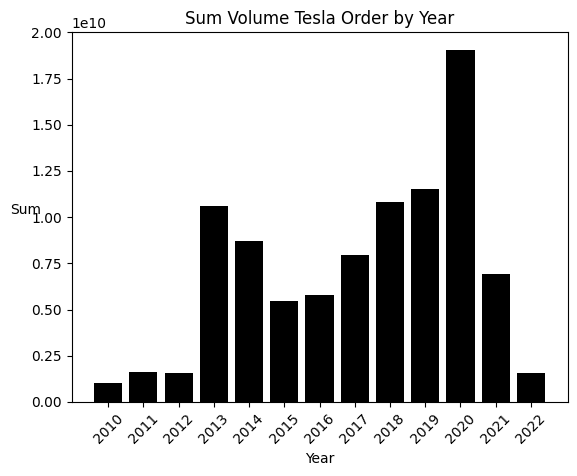

In [26]:
import matplotlib.pyplot as plt 

xplot = sum_volume_df["Year"]
yplot = sum_volume_df["Sum_Volume"]

plt.xlabel("Year",rotation = 0)
plt.ylabel("Sum",rotation = 0)

plt.title("Sum Volume Tesla Order by Year")

plt.xticks(rotation=45)

plt.bar(xplot,yplot,color="black")
plt.show()

In [27]:
data["Diff_hl"] = data["High"] - data["Low"]

data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Diff_hl
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,1.492000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,1.424000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,1.130000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,0.878000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,0.834000
...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,40.459961
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,35.759949
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,76.109985
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,64.299927


In [28]:
new_data = data.iloc[:,[0,2,3,7,8]]

sort_diff = new_data.sort_values(by="Diff_hl",ascending=False).head(10)

sort_diff.columns = ["Date","High","Low","Year","Diff_hl"]

sort_diff

,Date,High,Low,Year,Diff_hl
2862,2021-11-09,1174.500000,1011.520020,2021,162.979980
2872,2021-11-23,1180.500000,1062.699951,2021,117.800049
2916,2022-01-27,935.390015,829.000000,2022,106.390015
2935,2022-02-24,802.479980,700.000000,2022,102.479980
2851,2021-10-25,1045.020020,944.200012,2021,100.820008
2681,2021-02-23,713.609985,619.000000,2021,94.609985
2852,2021-10-26,1094.939941,1001.440002,2021,93.499939
2856,2021-11-01,1209.750000,1118.660034,2021,91.089966
2863,2021-11-10,1078.099976,987.309998,2021,90.789978
2879,2021-12-03,1090.579956,1000.210022,2021,90.369934


In [29]:
sort_diff["Year"].value_counts()

2021    8
2022    2
Name: Year, dtype: int64

In [30]:
data["Diff_pc"] = abs(data["Open"]-data["Close"])

data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Diff_hl,Diff_pc
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,1.492000,0.978000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,1.424000,0.392000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,1.130000,0.608000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,0.878000,0.760000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,0.834000,0.778000
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,40.459961,30.900025
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,35.759949,6.179993
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,76.109985,63.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,64.299927,19.169983


In [31]:
new_data = data.iloc[:,[0,1,4,7,9]]

sort_diff_pc = new_data.sort_values(by="Diff_pc",ascending=False).head(10)

sort_diff_pc.columns = ["Date","Open","Close","Year","Diff_pc"]

sort_diff_pc

,Date,Open,Close,Year,Diff_pc
2862,2021-11-09,1173.599976,1023.500000,2021,150.099976
2916,2022-01-27,933.359985,829.099976,2022,104.260009
2935,2022-02-24,700.390015,800.770020,2022,100.380005
2907,2022-01-13,1109.069946,1031.560059,2022,77.509887
2851,2021-10-25,950.530029,1024.859985,2021,74.329956
2879,2021-12-03,1084.790039,1014.969971,2021,69.820068
2888,2021-12-16,994.500000,926.919983,2021,67.580017
2934,2022-02-23,830.429993,764.039978,2022,66.390015
2877,2021-12-01,1160.699951,1095.000000,2021,65.699951
2691,2021-03-09,608.179993,673.580017,2021,65.400024


In [32]:
sort_diff_pc["Year"].value_counts()

2021    6
2022    4
Name: Year, dtype: int64

In [33]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Diff_hl,Diff_pc
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,1.492000,0.978000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,1.424000,0.392000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,1.130000,0.608000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,0.878000,0.760000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,0.834000,0.778000
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,40.459961,30.900025
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,35.759949,6.179993
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,76.109985,63.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,64.299927,19.169983


In [34]:
min_high_by_year = data.groupby("Year")["High"].min()
min_high_by_year_df = min_high_by_year.reset_index()
min_high_by_year_df.columns = ["Years","High_Min"]

min_high_by_year_df

,Years,High_Min
0,2010,3.326000
1,2011,4.454000
2,2012,5.370000
3,2013,6.676000
4,2014,29.400000
5,2015,37.858002
6,2016,30.993999
7,2017,44.066002
8,2018,52.066002
9,2019,37.335999


In [35]:
mean_high_by_year = data.groupby("Year")["High"].mean()
mean_high_by_year_df = mean_high_by_year.reset_index()
mean_high_by_year_df.columns = ["Years","High_Mean"]

mean_high_by_year_df

,Years,High_Mean
0,2010,4.815446
1,2011,5.476048
2,2012,6.361832
3,2013,21.370603
4,2014,45.489976
5,2015,46.676333
6,2016,42.686699
7,2017,63.690119
8,2018,64.738725
9,2019,55.529960


In [36]:
max_high_by_year = data.groupby("Year")["High"].max()
max_high_by_year_df = max_high_by_year.reset_index()
max_high_by_year_df.columns = ["Years","High_Max"]

max_high_by_year_df

,Years,High_Max
0,2010,7.284000
1,2011,7.000000
2,2012,7.990000
3,2013,38.900002
4,2014,58.284000
5,2015,57.330002
6,2016,53.868000
7,2017,77.921997
8,2018,77.491997
9,2019,87.061996


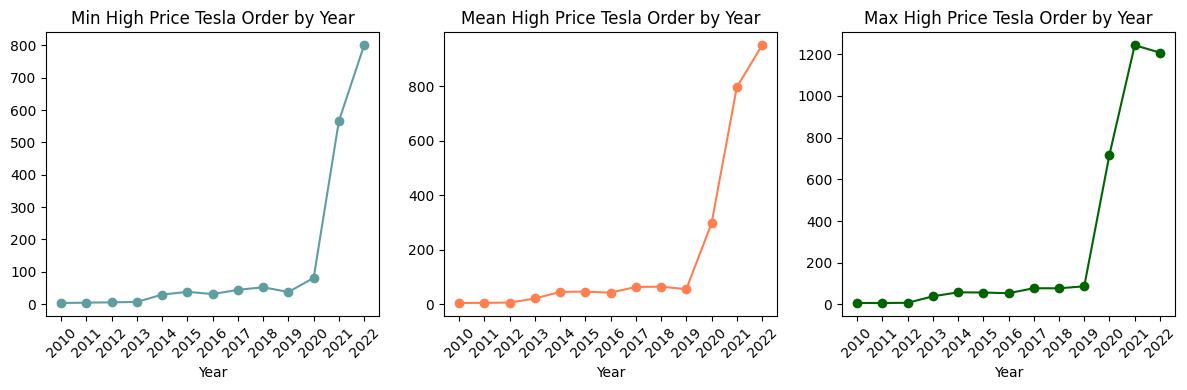

In [37]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)

xplot = min_high_by_year_df["Years"]
yplot = min_high_by_year_df["High_Min"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="cadetblue")

plt.title("Min High Price Tesla Order by Year")

plt.subplot(1,3,2)

xplot = mean_high_by_year_df["Years"]
yplot = mean_high_by_year_df["High_Mean"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="coral")

plt.title("Mean High Price Tesla Order by Year")

plt.subplot(1,3,3)

xplot = max_high_by_year_df["Years"]
yplot = max_high_by_year_df["High_Max"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkgreen")

plt.title("Max High Price Tesla Order by Year")


plt.tight_layout() 
plt.show()

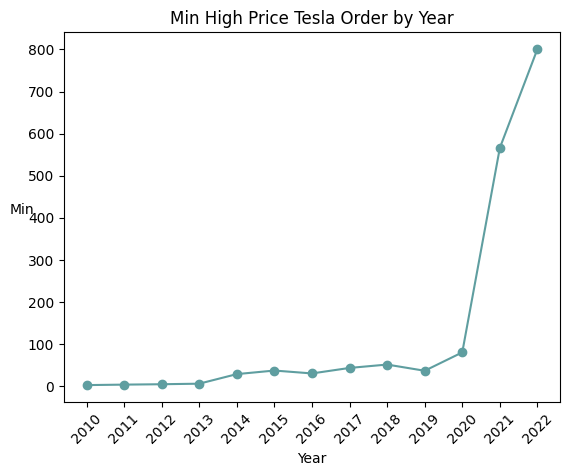

In [38]:
import matplotlib.pyplot as plt 

xplot = min_high_by_year_df["Years"]
yplot = min_high_by_year_df["High_Min"]

plt.xlabel("Year")
plt.ylabel("Min",rotation = 0)

plt.title("Min High Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="cadetblue")
plt.show()

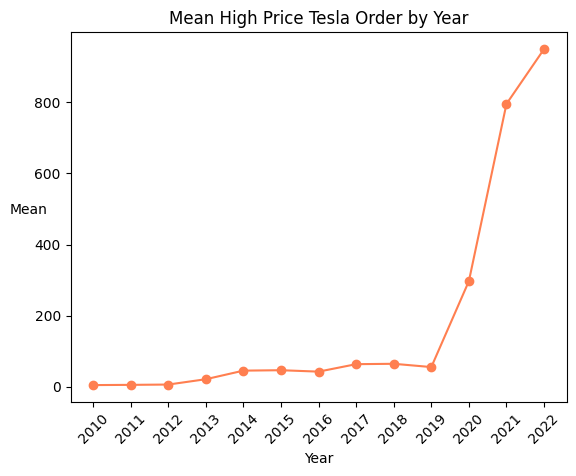

In [39]:
import matplotlib.pyplot as plt 

xplot = mean_high_by_year_df["Years"]
yplot = mean_high_by_year_df["High_Mean"]

plt.xlabel("Year")
plt.ylabel("Mean",rotation = 0)

plt.title("Mean High Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="coral")
plt.show()

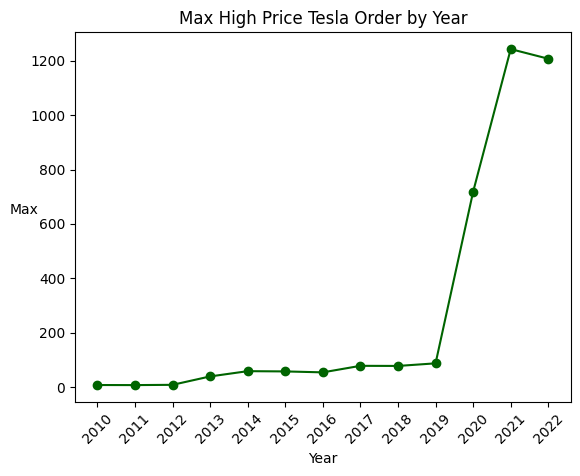

In [40]:
import matplotlib.pyplot as plt 

xplot = max_high_by_year_df["Years"]
yplot = max_high_by_year_df["High_Max"]

plt.xlabel("Year")
plt.ylabel("Max",rotation = 0)

plt.title("Max High Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkgreen")
plt.show()

In [41]:
min_low_by_year = data.groupby("Year")["Low"].min()
min_low_by_year_df = min_low_by_year.reset_index()
min_low_by_year_df.columns = ["Years","Low_Min"]

min_low_by_year_df

,Years,Low_Min
0,2010,2.996000
1,2011,4.222000
2,2012,4.528000
3,2013,6.422000
4,2014,27.334000
5,2015,36.279999
6,2016,28.209999
7,2017,42.192001
8,2018,48.917999
9,2019,35.397999


In [42]:
mean_low_by_year = data.groupby("Year")["Low"].mean()
mean_low_by_year_df = mean_low_by_year.reset_index()
mean_low_by_year_df.columns = ["Years","Low_Mean"]

mean_low_by_year_df

,Years,Low_Mean
0,2010,4.529215
1,2011,5.238833
2,2012,6.109176
3,2013,20.355976
4,2014,43.841222
5,2015,45.254127
6,2016,41.257230
7,2017,61.937394
8,2018,62.110462
9,2019,53.722508


In [43]:
max_low_by_year = data.groupby("Year")["Low"].max()
max_low_by_year_df = max_low_by_year.reset_index()
max_low_by_year_df.columns = ["Years","Low_Max"]

max_low_by_year_df

,Years,Low_Max
0,2010,6.950000
1,2011,6.806000
2,2012,7.422000
3,2013,37.674000
4,2014,56.080002
5,2015,55.259998
6,2016,50.902000
7,2017,75.870003
8,2018,73.424004
9,2019,85.269997


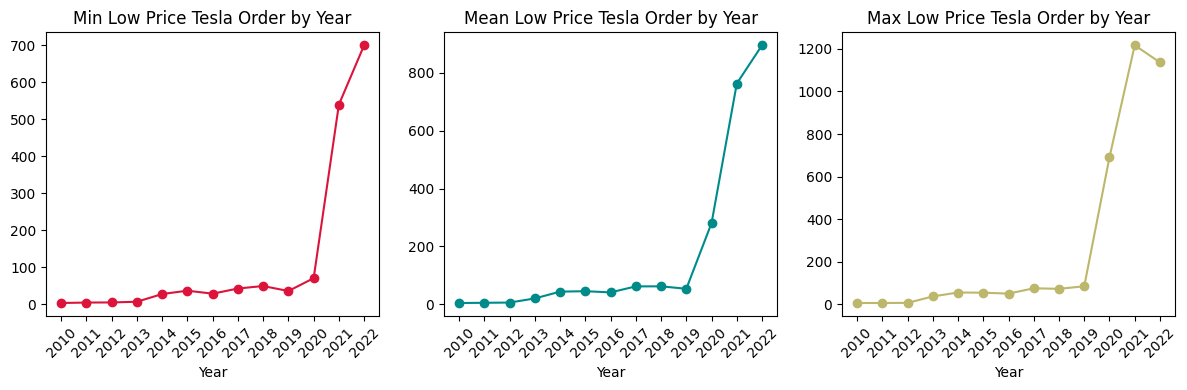

In [44]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)

xplot = min_low_by_year_df["Years"]
yplot = min_low_by_year_df["Low_Min"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="crimson")

plt.title("Min Low Price Tesla Order by Year")

plt.subplot(1,3,2)

xplot = mean_low_by_year_df["Years"]
yplot = mean_low_by_year_df["Low_Mean"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkcyan")

plt.title("Mean Low Price Tesla Order by Year")

plt.subplot(1,3,3)

xplot = max_low_by_year_df["Years"]
yplot = max_low_by_year_df["Low_Max"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkkhaki")

plt.title("Max Low Price Tesla Order by Year")


plt.tight_layout() 
plt.show()

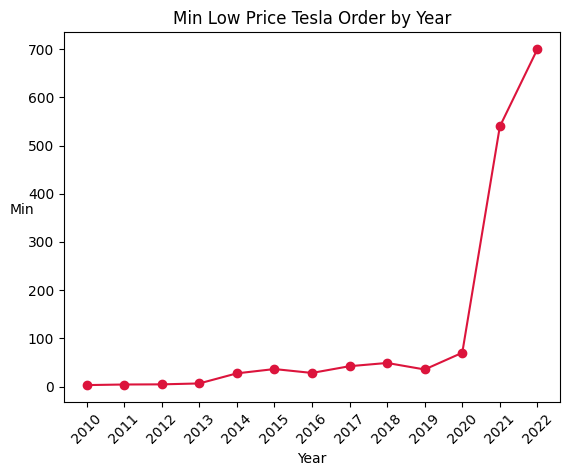

In [45]:
import matplotlib.pyplot as plt 

xplot = min_low_by_year_df["Years"]
yplot = min_low_by_year_df["Low_Min"]

plt.xlabel("Year")
plt.ylabel("Min",rotation = 0)

plt.title("Min Low Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="crimson")
plt.show()

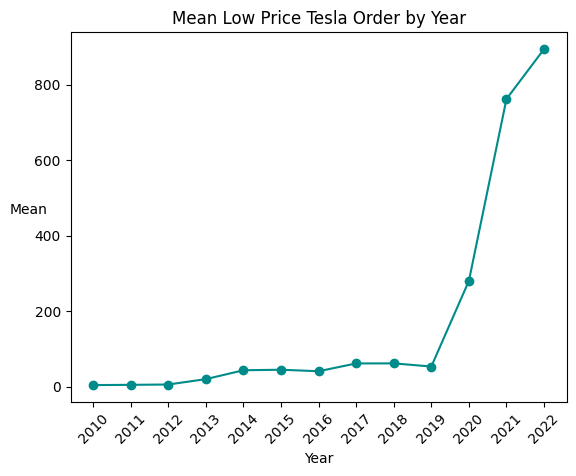

In [46]:
import matplotlib.pyplot as plt 

xplot = mean_low_by_year_df["Years"]
yplot = mean_low_by_year_df["Low_Mean"]

plt.xlabel("Year")
plt.ylabel("Mean",rotation = 0)

plt.title("Mean Low Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkcyan")
plt.show()

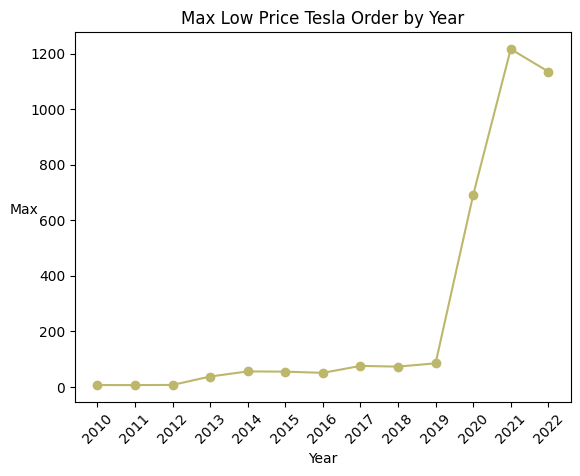

In [47]:
import matplotlib.pyplot as plt 

xplot = max_low_by_year_df["Years"]
yplot = max_low_by_year_df["Low_Max"]

plt.xlabel("Year")
plt.ylabel("Max",rotation = 0)

plt.title("Max Low Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="darkkhaki")
plt.show()

In [48]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Diff_hl,Diff_pc
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500,2010,1.492000,0.978000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500,2010,1.424000,0.392000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000,2010,1.130000,0.608000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000,2010,0.878000,0.760000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500,2010,0.834000,0.778000
...,...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500,2022,40.459961,30.900025
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200,2022,35.759949,6.179993
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500,2022,76.109985,63.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400,2022,64.299927,19.169983


In [49]:
data = data.drop(["Adj Close"],axis = 1)

data

,Date,Open,High,Low,Close,Volume,Year,Diff_hl,Diff_pc
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,2010,1.492000,0.978000
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,2010,1.424000,0.392000
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,2010,1.130000,0.608000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,2010,0.878000,0.760000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,2010,0.834000,0.778000
...,...,...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,33408500,2022,40.459961,30.900025
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,27327200,2022,35.759949,6.179993
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,35289500,2022,76.109985,63.979980
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,40225400,2022,64.299927,19.169983
